In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch import optim
import helper

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [2]:
model=nn.Sequential(nn.Linear(784,128),
                   nn.ReLU(),
                   nn.Linear(128,64),
                   nn.ReLU(),
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1))
# criterion=nn.CrossEntropyLoss()
criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

epochs=5
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        images=images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        
        output=model.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        
    else:
        print "Training Loss:",running_loss/len(trainloader)


Training Loss: 1.0355416408
Training Loss: 0.376388918704
Training Loss: 0.318289907184
Training Loss: 0.285379546593
Training Loss: 0.25985452694


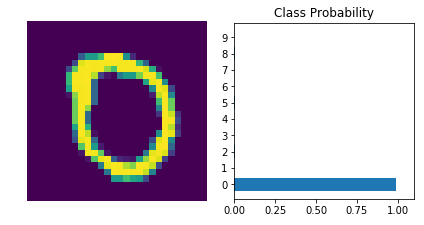

In [3]:

images,labels=next(iter(trainloader))

img=images[0].view(1,784)

with torch.no_grad():
    logits=model.forward(img)

ps=F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28),ps)